## /workspace/pcos_dataset 데이터셋 분포

In [ ]:
data_root_dir = "/workspace/pcos_dataset/Dataset"

from glob import glob 
import os
import pandas as pd 
data_files = glob(f"{data_root_dir}/*.png")

len(data_files)

In [ ]:
cls_dict = {
    "benign" : 0,
    "Bordlerine" : 0,
    "Malignant" : 0
}

pid_set = list()
pids, labels, filenames = list(), list(), list()
for data_file in data_files:
    filename = data_file.split("/")[-1].split('.')[0]
    label = data_file.split("/")[-1].split("_")[0]
    pid = data_file.split("/")[-1].split("_")[1]
    
    pids.append(pid)
    labels.append(label)
    filenames.append(filename)

    if label == str(0):
        cls_dict["benign"] += 1
    elif label == str(1):
        cls_dict["Bordlerine"] += 1
    elif label == str(2):
        cls_dict["Malignant"] += 1
    
    pid_set.append(pid)

# pid_set = list(set(pid_set))
# print(f"PID Length : {len(pid_set)}")
# df = pd.DataFrame(cls_dict, index=[0])
# df.to_csv("/workspace/pcos_dataset/Dataset_info.csv", index=False)

df = pd.DataFrame(
    {
        "pid" : pids,
        "filename" : filenames,
        "label" : labels
    }
)

df.to_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv", index=False)

## /workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv 데이터 분포

In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

def text_normalize(x):
    if isinstance(x, str):
        # x = x.replace(" ", "")
        x = x.lower()
        x= x.strip()
    return x
df['USG_Dignosis'] = df['USG_Dignosis'].apply(text_normalize)
df['Pathology_Dignosis'] = df['Pathology_Dignosis'].apply(text_normalize)

# df['USG_Dignosis'].value_counts().to_dict()

pathology_cls_dict = df['Pathology_Dignosis'].value_counts().to_dict()
usg_cls_dict = df['USG_Dignosis'].value_counts().to_dict()

pathology_df = pd.DataFrame(pathology_cls_dict, index=[0]).T
usg_df = pd.DataFrame(usg_cls_dict, index=[0]).T

display(pathology_df.head(3))
display(usg_df.head(3))
# pathology_df.to_csv("/workspace/pcos_dataset/pathology_cls.csv", index=True)
# usg_df.to_csv("/workspace/pcos_dataset/usg_cls.csv", index=True)

In [ ]:
# df['USG_Dignosis'].value_counts().to_dict()
# pd.DataFrame(df['label|0:양성, 1:중간형, 2:악성'].value_counts().to_dict(), index=[0]).T
print(f"pid length : {len(df)}")

## /workspace/pcos_dataset/labels/Ovariancyst_datamangerment.csv 데이터 분포

In [ ]:
import pandas as pd 
from IPython.display import display
df = pd.read_csv("/workspace/pcos_dataset/labels/Ovariancyst_datamangerment.csv")

def text_normalize(x):
    if isinstance(x, str):
        # x = x.replace(" ", "")
        x = x.lower()
        x= x.strip()
    return x
df['USG_Diagnosis'] = df['USG_Diagnosis'].apply(text_normalize)
df['Pathology_Diagnosis'] = df['Pathology_Diagnosis'].apply(text_normalize)

# df['USG_Diagnosis'].value_counts().to_dict()

pathology_cls_dict = df['Pathology_Diagnosis'].value_counts().to_dict()
usg_cls_dict = df['USG_Diagnosis'].value_counts().to_dict()

data_management_pathology_df = pd.DataFrame(pathology_cls_dict, index=[0]).T
data_management_usg_df = pd.DataFrame(usg_cls_dict, index=[0]).T

display(data_management_pathology_df.head(3))
display(data_management_usg_df.head(3))
print(f"pid length : {len(df)}")

## 기존 데이터 분포 <-> 라벨표기변경데이터시트 라벨차이

In [ ]:
import pandas as pd 

기존_df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")
변경_df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

""" 데이터 개수 차이가 79개 존재 / 기존_df : 1171개 / 변경_df : 1250개 """
# 기존 df에서 pid가 같으면 filename상관없이 (첫번째껄로)하고 나머지는 버린 다음 기존_pid_df로 만들어주라.
기존_pid_df = 기존_df.drop_duplicates(subset='pid', keep='first').reset_index(drop=True)
print(f"기존 라벨 pid 수 : {len(기존_pid_df)}")
print(f"변경 라벨 pid 수 : {len(변경_df)}")

""" 변경_df에서 PIDs가 기존_pid_df에 없는 경우 79개 존재"""
# 변경_df에서 PIDs가 기존_pid_df에 없는 경우 print
diff_pids = 변경_df[~변경_df['pid'].isin(기존_pid_df['pid'])]
print(f"변경_df에서 기존에 없는 PIDs 개수: {len(diff_pids)}")

### 기존_pid_df에서 label이 변경_df와 다른 경우 해당하는 filename 출력
기존_pid_df['label'] = 기존_pid_df['label'].astype(str)
변경_df['label|0:양성, 1:중간형, 2:악성'] = 변경_df['label|0:양성, 1:중간형, 2:악성'].astype(str)


# pid 기준으로 두 DataFrame을 merge한 뒤, label이 다른 경우를 찾음
merged = pd.merge(
    기존_pid_df[['pid', 'filename', 'label']],
    변경_df[['pid', 'label|0:양성, 1:중간형, 2:악성']],
    on='pid',
    how='inner'
)

diff_df = merged[merged['label'] != merged['label|0:양성, 1:중간형, 2:악성']]
print(f"# 기존 라벨과 변경 라벨의 라벨이 다른 경우 : {len(diff_df)}개")
display(diff_df)


# 기존 df와 변경 df간의 라벨 이동 차이 이동행렬 제대로 구하기

# '기존_pid_df'와 '변경_df'는 각각 pid별로 존재하는 라벨임 (서로 컬럼명 다름에 주의)
# '기존라벨' 과 '변경라벨'이라는 새 컬럼 만들어서 pid별로 merge
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='NanumSquare')
import seaborn as sns

label_compare_df = pd.merge(
    기존_pid_df[['pid', 'label']],
    변경_df[['pid', 'label|0:양성, 1:중간형, 2:악성']],
    on='pid',
    how='inner'
).rename(columns={
    'label': '기존라벨',
    'label|0:양성, 1:중간형, 2:악성': '변경라벨'
})

# 이동행렬 구하기
movement_table = pd.crosstab(label_compare_df['기존라벨'], label_compare_df['변경라벨'])
movement_table.index.name = "기존 라벨"
movement_table.columns.name = "변경 라벨"

print("기존 라벨과 변경 라벨간 이동행렬(Confusion Matrix, label 변화 count):")
display(movement_table)

# Confusion matrix 시각화
plt.figure(figsize=(6,5))
sns.heatmap(movement_table, annot=True, fmt='d', cmap='Blues')
plt.title('기존 라벨 vs 변경 라벨 Confusion Matrix')
plt.ylabel('기존 라벨')
plt.xlabel('변경 라벨')
plt.show()



## /workspace/pcos_dataset/labels/기존_Dataset_info.csv 에서 데이터 분포확인

In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")

label_dist_df = pd.DataFrame(df['label'].value_counts()).reset_index()

label_dist_df



label|0:양성, 1:중간형, 2:악성	count
0	933
2	192
1	125


In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

label_dist_df = pd.DataFrame(df["label|0:양성, 1:중간형, 2:악성"].value_counts()).reset_index()

label_dist_df

### 변경_Dataset_info.csv 제작

In [ ]:
import pandas as pd 

# 기존 데이터
기존_df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")
# 변경 라벨 시트 (pid, ~, ~, 'label|0:양성, 1:중간형, 2:악성')
변경_df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")
save_path = "/workspace/pcos_dataset/labels/변경_Dataset_info.csv"

# pid 기준으로 merge하여 label 업데이트
# 변경_df에서 필요한 컬럼만 (pid, label)
label_map = 변경_df.set_index('pid')["label|0:양성, 1:중간형, 2:악성"]

# 기존_df의 pid가 변경_df에 존재할 때만 label을 덮어씌운다
변경후_df = 기존_df.copy()
변경후_df['label'] = 변경후_df['pid'].map(label_map).fillna(변경후_df['label'])

# 저장
변경후_df.to_csv(save_path, index=False)

## Bianry 제작

In [ ]:
import pandas as pd 

multi_label_path = "/workspace/pcos_dataset/labels/기존_Dataset_info.csv"
df = pd.read_csv(multi_label_path)

binary_df = df[df['label'] != 1]
binary_df.to_csv(multi_label_path.replace(".csv", "_binary.csv"), index=False)

## 라벨 텍스트기반 데이터셋 제작

In [1]:
import pandas as pd
import re
from utils.ontology import normalize_txt, usg_ontology_parse, pathology_ontology_parse
# ================================
# 📌 5. DataFrame 전체 적용
# ================================
datasheet = "/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv"
datasheet_df = pd.read_csv(datasheet)

print(len(datasheet_df))
# [Step1] 정규화
datasheet_df = normalize_txt(datasheet_df, 'USG_Dignosis')
datasheet_df = normalize_txt(datasheet_df, 'Pathology_Dignosis')

# [Step2] Null값 제거
print(f"기존 데이터셋 크기 : {len(datasheet_df)}")
datasheet_df = datasheet_df[
    ~(datasheet_df['USG_Dignosis'].isnull() |
      datasheet_df['Pathology_Dignosis'].isnull())
]
print(f"Null값 제거 후 데이터셋 크기 : {len(datasheet_df)}")

# [Step3] Benign / Borderline / Malignant 로 분류 
datasheet_df['USG_Ontology'] = datasheet_df['USG_Dignosis'].apply(usg_ontology_parse)
datasheet_df['Pathology_Ontology'] = datasheet_df['Pathology_Dignosis'].apply(pathology_ontology_parse)

# label|0:양성, 1:중간형, 2:악성 -> '변경라벨'로 컬럼명 변경
datasheet_df = datasheet_df.rename(columns={"label|0:양성, 1:중간형, 2:악성": "변경라벨"})

datasheet_df.to_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트_ontology.csv")
# "변경라벨", "USG_Ontology", "Pathology_Ontology" 간 매칭 confusion matrix 생성

datasheet_df

1250
기존 데이터셋 크기 : 1250
Null값 제거 후 데이터셋 크기 : 1227


,pid,USG_Dignosis,Pathology_Dignosis,변경라벨,USG_Ontology,Pathology_Ontology
0,R001,endometrioma,borderline endometrioid tumor,1,0,1
1,R002,endometrioma,carcinoid tumor,2,0,0
2,R003,endometrioma,carcinosarcoma,2,0,2
3,R004,endometrioma,carcinosarcoma,2,0,2
4,R005,mucinous cystadenoma,cellular fibroma (borderline),1,0,1
...,...,...,...,...,...,...
1245,R995,serous cystadenoma,seromucinous cystadenoma,0,0,0
1246,R996,borderline,mucinous borderline tumor with microinvasion,1,1,1
1247,R997,teratoma,"endometriosis, mature cystic teratoma, right /...",0,0,0
1248,R998,endometriosis,endometriotic cyst,0,0,0


In [11]:
기존라벨_df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")
기존라벨_df = 기존라벨_df.rename(columns={"label": "기존라벨"})
print(len(기존라벨_df))
# datasheet_df의 pid와 기존라벨_df의 pid를 기준으로 left join하여 통합 dataframe 생성
통합라벨_df = pd.merge(
    기존라벨_df,
    datasheet_df,
    how="left",
    left_on="pid",
    right_on="pid"
)

# 원하는 컬럼 순서로 정렬
통합라벨_df = 통합라벨_df[
    [
        "pid",
        "filename",
        "기존라벨",
        "변경라벨",
        "USG_Ontology",
        "Pathology_Ontology",
        "USG_Dignosis",
        "Pathology_Dignosis"
    ]
]
# '변경라벨', 'USG_Ontology', 'Pathology_Ontology' 컬럼을 int로 변환하여 출력
for col in ['변경라벨', 'USG_Ontology', 'Pathology_Ontology']:
    if col in 통합라벨_df.columns:
        통합라벨_df[col] = pd.to_numeric(통합라벨_df[col], errors='coerce').astype(pd.Int64Dtype())

# USG_Ontology 에서 nan인 row 제거
통합라벨_df = 통합라벨_df[통합라벨_df['USG_Ontology'].notna()]

통합라벨_df.to_csv("/workspace/pcos_dataset/labels/통합_Dataset_info.csv")

통합라벨_df_binary = 통합라벨_df[통합라벨_df['USG_Ontology'] != 1]
통합라벨_df_binary.to_csv("/workspace/pcos_dataset/labels/통합_Dataset_info_binary.csv")

2968


In [ ]:
display(통합라벨_df[통합라벨_df['USG_Ontology']==1]['USG_Dignosis'].value_counts().keys())

usg_nan_count = 통합라벨_df['USG_Ontology'].isna().sum()
print(f"'USG_Ontology' NaN 개수: {usg_nan_count}")
# nan인 값만 display

Index(['borderline', 'borderline tumor', 'ro cyst', 'cystadenoma', 'lo cyst',
       'lo mass', 'mucinous borderline tumor', 'hemorrhagic cyst', 'ro mass',
       'endometric cyst', 'pelvic cyst', 'pelvic mass', 'echogenic mass',
       'multiseptated cyst', 'r/o tubal ca.', 'cyst', 'trilocular cyst',
       'ovarian cyst', 'borderline epithelial neoplasm',
       'ovarian stromal tumor', 'solid mass', 'cystic tumor',
       'cystadenoma, borderline', 'bo cysts', 'ova tumor', 'taratoma',
       'cystic lesion', 'ova cyst', 'toa', 'lo complex cyst',
       'r/o borderline tumor', 'mucinous cyst',
       'mucinous cystaenoma, borderline tumor', 'borderline serous',
       'unilocular cyst', 'paraovarian cyst', 'tubo-ovarian abscess', 'serous',
       'borerline tumor', 'tumor', 'lo tumor', 'solid tumor',
       'mixed echogenic cyst', 'ovarian tumor', 'ro cystic tumor',
       'complicated', 'serous cyst', 'anechoic cyst', 'huge lo mass',
       'ovarian epithelial tumor', 'homogenous cy

'USG_Ontology' NaN 개수: 0


In [9]:
datasheet_df

,pid,USG_Dignosis,Pathology_Dignosis,변경라벨,USG_Ontology,Pathology_Ontology
0,R001,endometrioma,borderline endometrioid tumor,1,0,1
1,R002,endometrioma,carcinoid tumor,2,0,0
2,R003,endometrioma,carcinosarcoma,2,0,2
3,R004,endometrioma,carcinosarcoma,2,0,2
4,R005,mucinous cystadenoma,cellular fibroma (borderline),1,0,1
...,...,...,...,...,...,...
1245,R995,serous cystadenoma,seromucinous cystadenoma,0,0,0
1246,R996,borderline,mucinous borderline tumor with microinvasion,1,1,1
1247,R997,teratoma,"endometriosis, mature cystic teratoma, right /...",0,0,0
1248,R998,endometriosis,endometriotic cyst,0,0,0


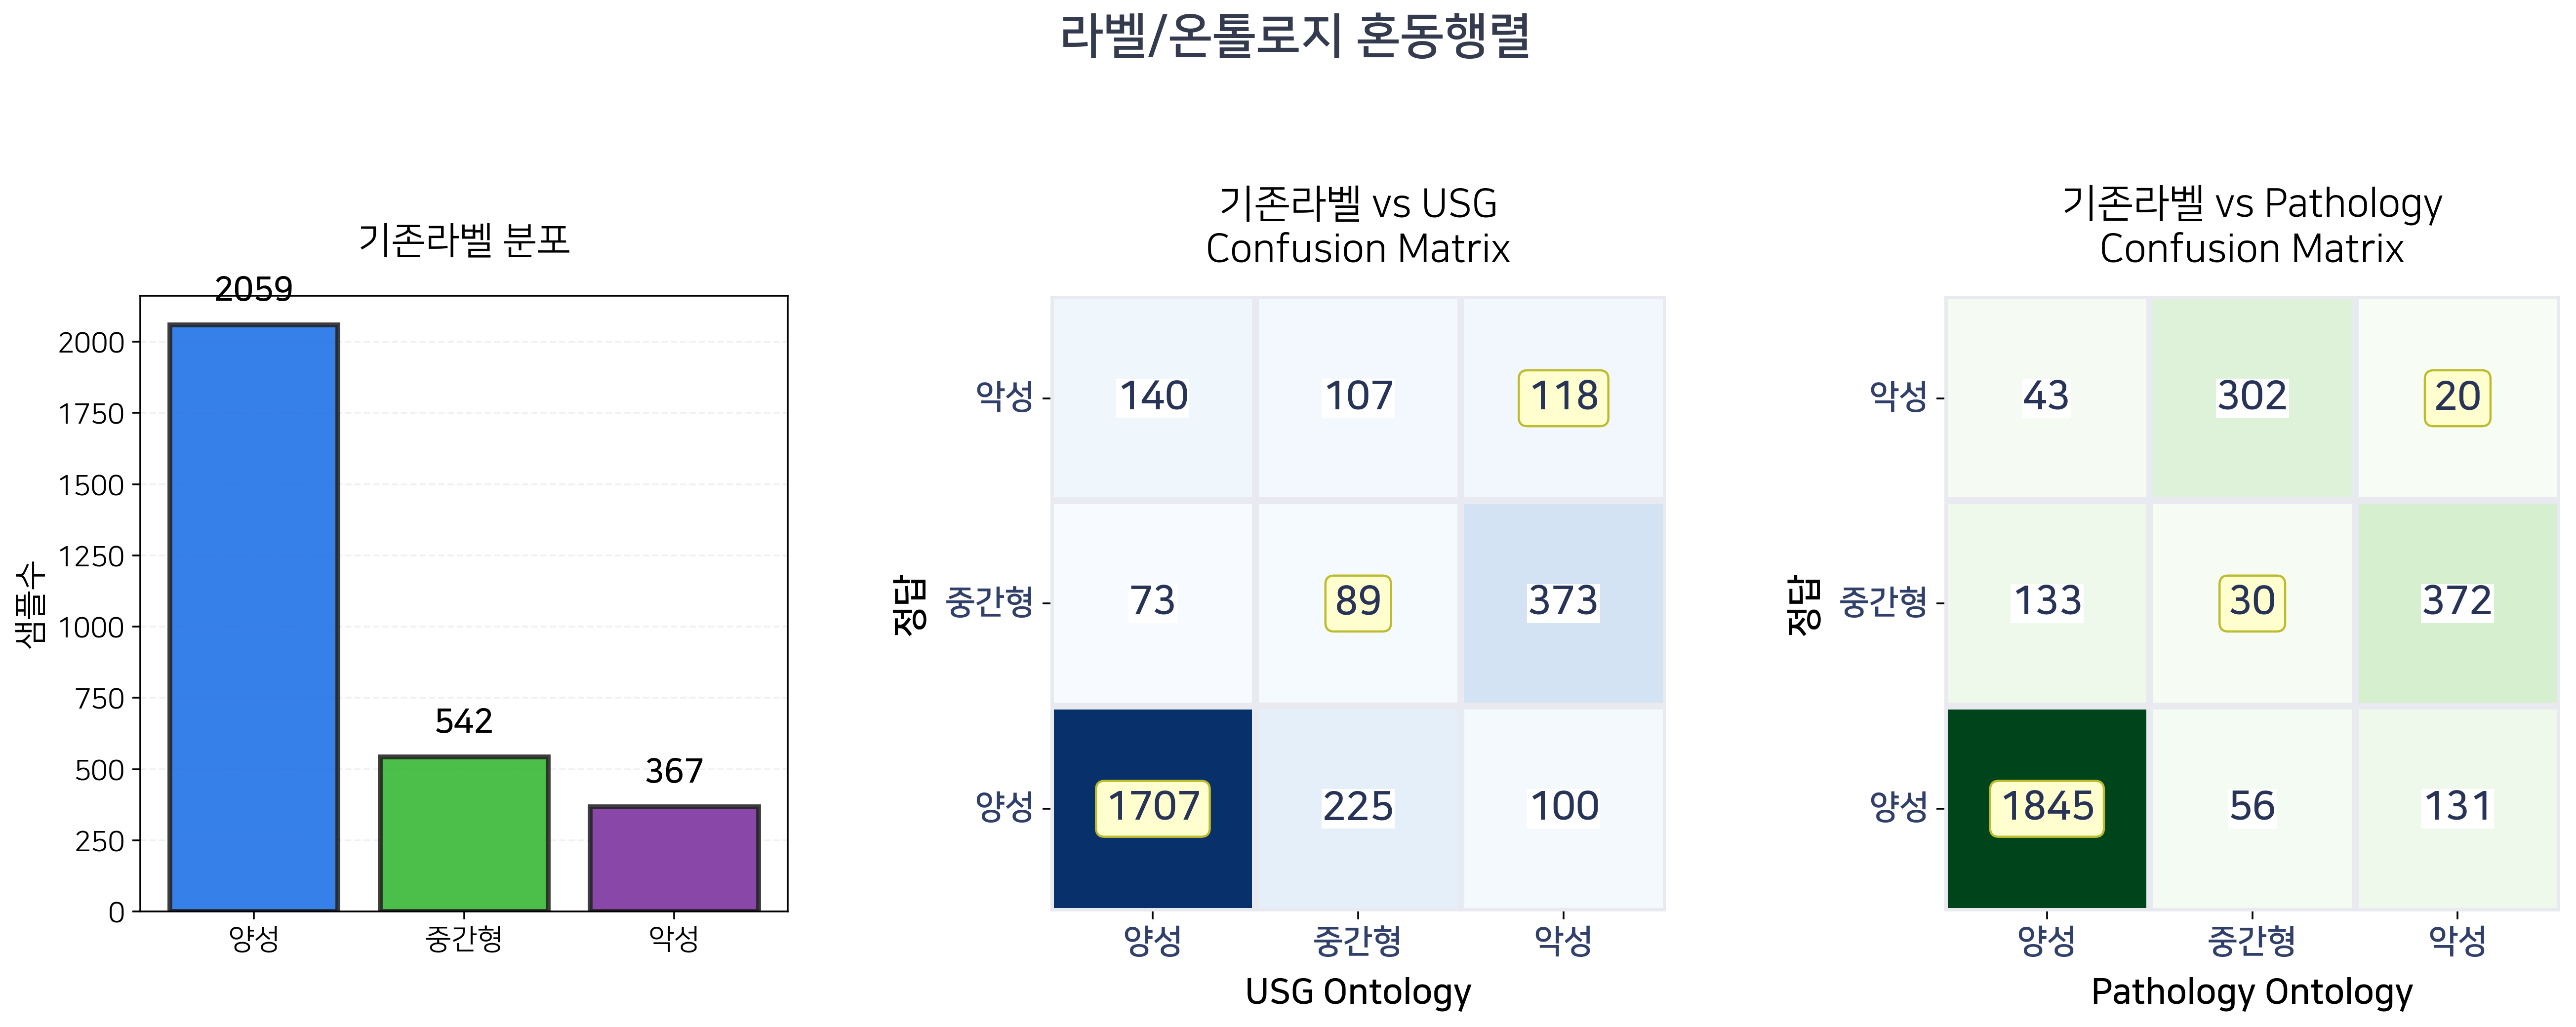

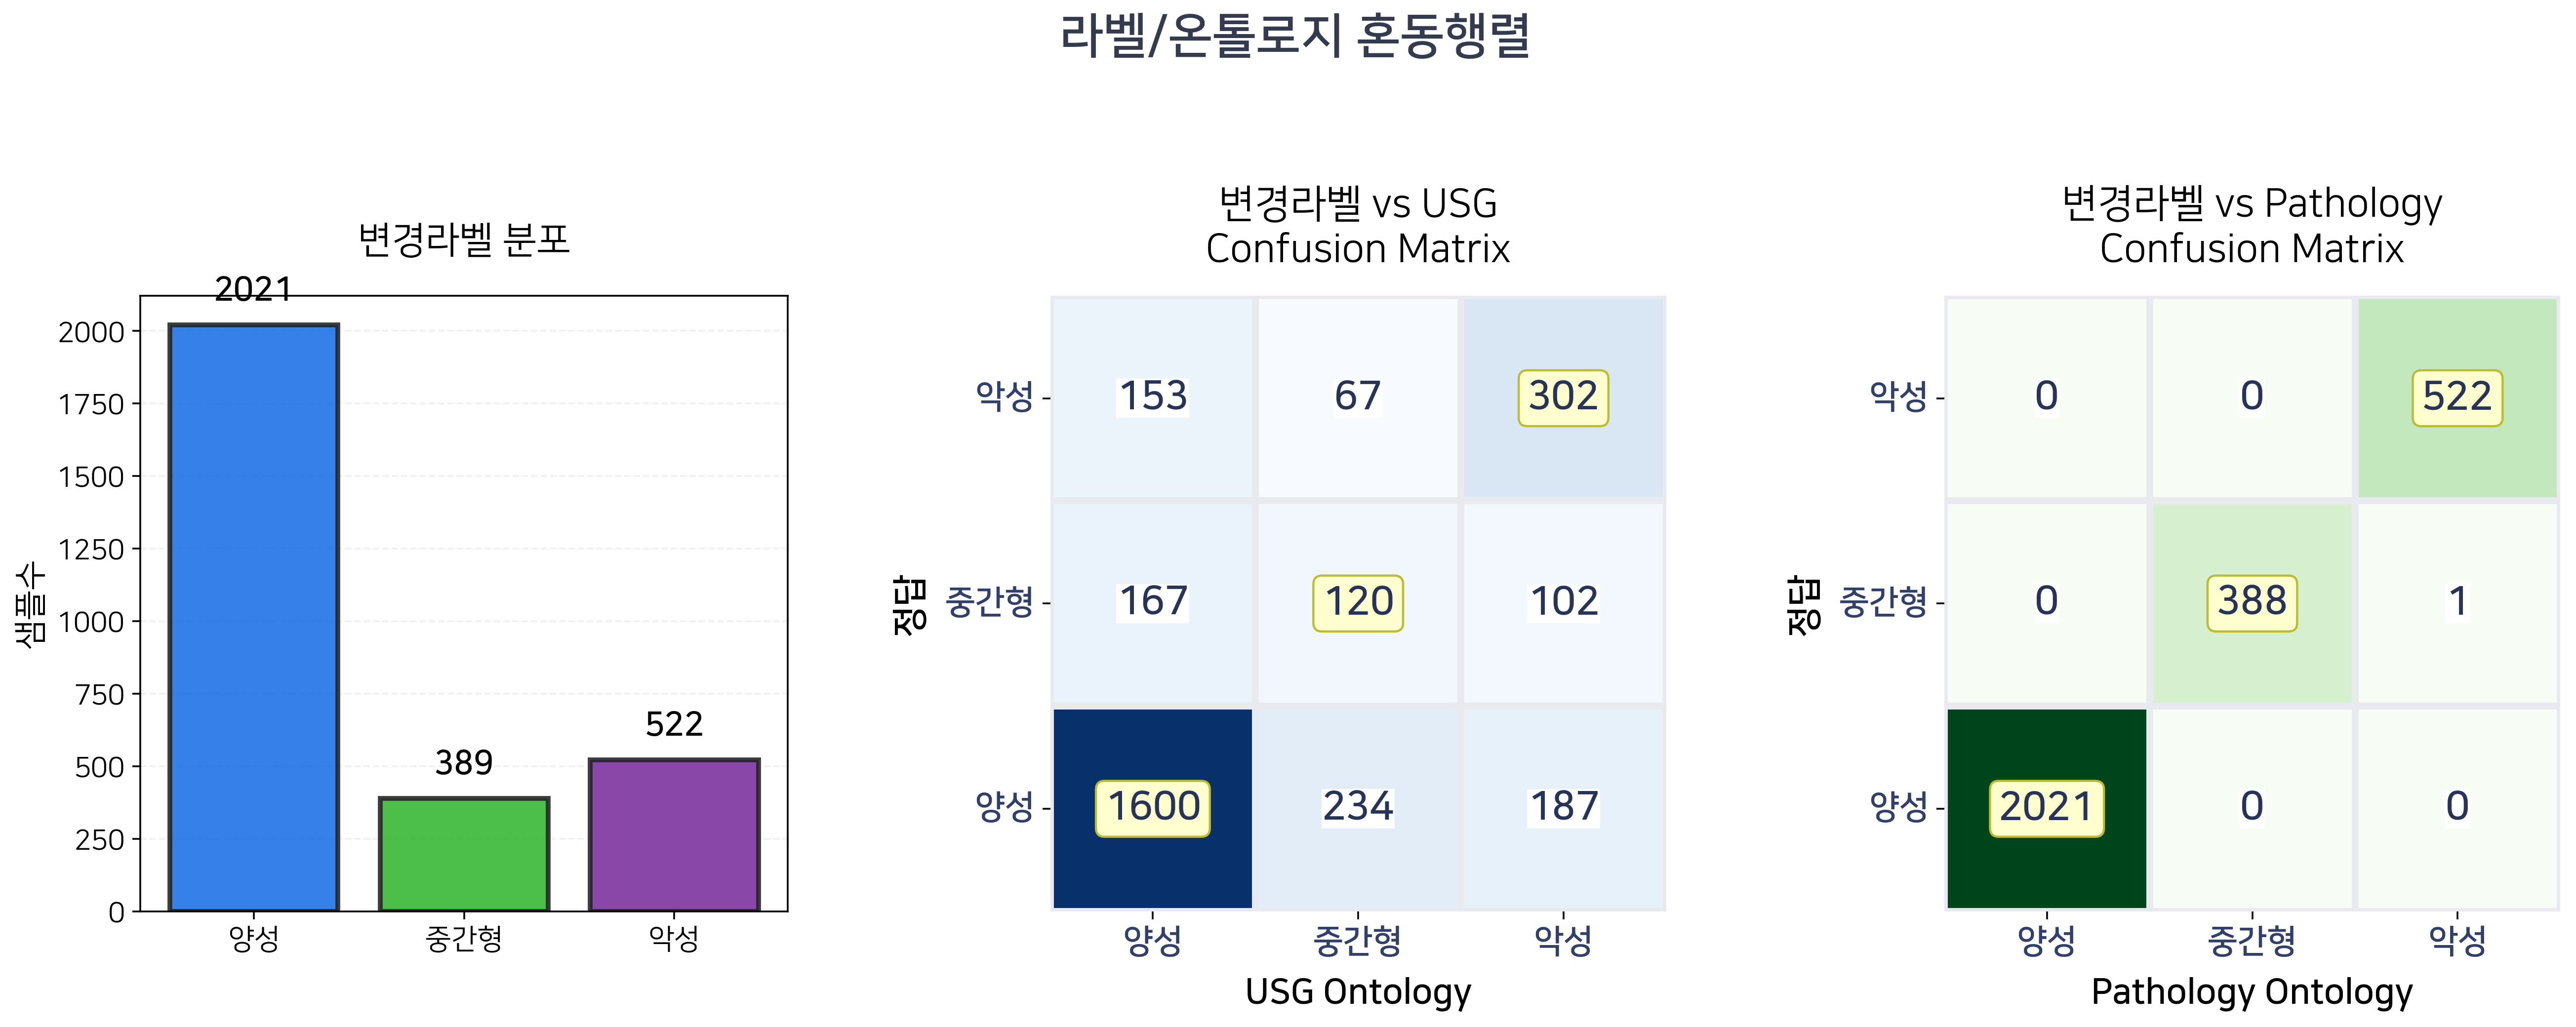

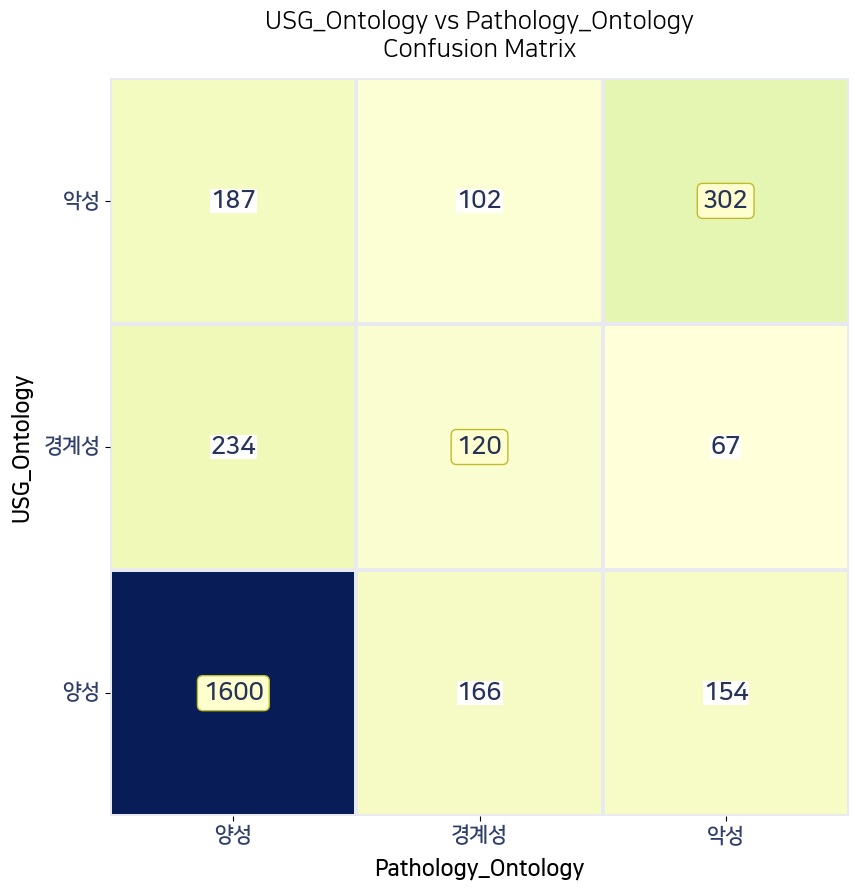

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["font.family"] = "NanumSquare"

def pretty_confusion_matrix(
    df, label_col, ontology_cols=[('USG_Ontology', 'USG'), ('Pathology_Ontology', 'Pathology')],
    class_labels={0: '양성', 1: '중간형', 2: '악성'}, 
    font="NanumSquare",
    highres=True
):
    import numpy as np

    plt.rcParams["font.family"] = font
    plt.rcParams["axes.unicode_minus"] = False

    # Prepare palette
    cmaps = ['Blues', 'Greens', 'Purples']
    boxes = [
        {'ec': "#00418D", 'fc': "#E6F0FA"},
        {'ec': "#207238", 'fc': "#E7F6EB"},
        {'ec': "#5D4386", 'fc': "#F3F0F9"}
    ]
    pad = 0.03
    
    # Preprocess
    for col in [label_col] + [colname for colname, _ in ontology_cols]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    n = len(ontology_cols)
    
    # === 고화질로 출력 ===
    # 기존 dpi: 120 -> 320, 폰트 크기도 같이 비례적으로 증가(아래에서 +4~+8씩)
    hd_dpi = 320 if highres else 120
    fig, axes = plt.subplots(1, n+1, figsize=(5.5*(n+1), 5.5), dpi=hd_dpi)
    fig.suptitle(f"라벨/온톨로지 혼동행렬", fontsize=22, fontweight='bold', y=1.13, color="#343B4E")

    # (1) 정답 라벨별 분포 (막대)
    counts = df[label_col].value_counts().sort_index()
    ax = axes[0]
    colors = ["#1A6EE7", "#32B630", "#792F9B"]
    bars = ax.bar(
        [class_labels.get(int(x), str(x)) for x in counts.index],
        counts.values, 
        color=colors, edgecolor="#222", linewidth=2.2, alpha=0.88
    )
    ax.set_title(f"{label_col} 분포", fontsize=17, loc='center', pad=20)
    for b in bars:
        ax.text(
            b.get_x() + b.get_width()/2, b.get_height()+pad*counts.max(),
            f"{int(b.get_height())}", ha='center', va='bottom',
            fontsize=15, weight='bold'
        )
    ax.set_ylabel("샘플수", fontsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.18)
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', labelsize=13)

    # (2) Confusion Matrices
    for i, (onto_col, onto_kr) in enumerate(ontology_cols):
        ax = axes[i+1]
        confusion = pd.crosstab(
            df[label_col], df[onto_col]
        ).reindex(index=[0,1,2], columns=[0,1,2], fill_value=0)
        sns.heatmap(
            confusion, annot=True, fmt='d', cmap=cmaps[i%len(cmaps)], 
            square=True, linewidths=2.8, linecolor='#E8EAF0',
            cbar=False, ax=ax,
            annot_kws={'fontsize':18, 'weight':'bold', 'color':'#273458'}
        )
        # axis labels
        ax.set_xlabel(f"{onto_kr} Ontology", fontsize=16, labelpad=8, weight='bold')
        ax.set_ylabel(f"{class_labels.get(None, '정답')}", fontsize=16, labelpad=8, weight='bold')
        ax.set_title(f"{label_col} vs {onto_kr}\nConfusion Matrix", fontsize=18, pad=16)
        # tick labels
        ax.set_xticklabels(
            [class_labels.get(k, str(k)) for k in confusion.columns], 
            fontsize=15, color="#31406A", weight='bold'
        )
        ax.set_yticklabels(
            [class_labels.get(k, str(k)) for k in confusion.index], 
            fontsize=15, color="#31406A", weight='bold', rotation=0, va="center"
        )
        # add counts on diagonal for emphasis
        for t in ax.texts:
            if t.get_position()[0] == t.get_position()[1]:
                t.set_backgroundcolor("#FFFF99")
                t.set_bbox(dict(fc="#FFFECF", ec="#BDBC2E", boxstyle="round,pad=0.22"))
            else:
                t.set_bbox(dict(fc="white", ec="none", pad=0.21))
        ax.invert_yaxis()

    plt.tight_layout(w_pad=4.1)
    plt.show()
    plt.rcParams["font.family"] = "sans-serif"  # reset

# 사용자가 보기 좋은 pretty cm (고화질로)
pretty_confusion_matrix(통합라벨_df, '기존라벨', highres=True)
pretty_confusion_matrix(통합라벨_df, '변경라벨', highres=True)

# 기존라벨과 변경라벨의 Confusion Matrix를 예쁘게 시각화
import seaborn as sns

def plot_pretty_confusion(통합라벨_df, true_label='기존라벨', pred_label='변경라벨', class_labels=None, highres=True):
    # 나눔스퀘어 폰트로 설정
    plt.rcParams['font.family'] = 'NanumSquare'
    cm = pd.crosstab(통합라벨_df[true_label], 통합라벨_df[pred_label]).reindex(index=[0,1,2], columns=[0,1,2], fill_value=0)
    plt.figure(figsize=(7, 6) if not highres else (11, 9))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap="YlGnBu", 
        square=True, linewidths=2.8, linecolor='#E8EAF0', 
        cbar=False, 
        annot_kws={'fontsize':18, 'weight':'bold', 'color':'#273458'}
    )
    plt.xlabel(f'{pred_label}', fontsize=16, labelpad=8, weight='bold', family='NanumSquare')
    plt.ylabel(f'{true_label}', fontsize=16, labelpad=8, weight='bold', family='NanumSquare')
    plt.title(f'{true_label} vs {pred_label}\nConfusion Matrix', fontsize=18, pad=16, family='NanumSquare')
    plt.xticks(
        ticks=[x+0.5 for x in range(len(cm.columns))], 
        labels=[class_labels.get(k, str(k)) if class_labels else str(k) for k in cm.columns], 
        fontsize=15, color="#31406A", weight='bold', family='NanumSquare'
    )
    plt.yticks(
        ticks=[y+0.5 for y in range(len(cm.index))], 
        labels=[class_labels.get(k, str(k)) if class_labels else str(k) for k in cm.index], 
        fontsize=15, color="#31406A", weight='bold', rotation=0, va="center", family='NanumSquare'
    )
    for t in plt.gca().texts:
        i, j = int(float(t.get_position()[1]-0.5)), int(float(t.get_position()[0]-0.5))
        if i == j:
            t.set_backgroundcolor("#FFFF99")
            t.set_bbox(dict(fc="#FFFECF", ec="#BDBC2E", boxstyle="round,pad=0.22"))
        else:
            t.set_bbox(dict(fc="white", ec="none", pad=0.21))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    # 필요하다면 폰트 전역설정 리셋 등 여기에 추가

plot_pretty_confusion(
    통합라벨_df, true_label='USG_Ontology', pred_label='Pathology_Ontology',
    class_labels={0:'양성', 1:'경계성', 2:'악성'}
)

In [15]:
from IPython.display import display
df = 통합라벨_df[(통합라벨_df['USG_Ontology'] == 2) & (통합라벨_df['Pathology_Ontology'] == 0)]
df = df[~df.duplicated(subset='pid', keep=False)].drop(columns=['pid'])
display(df)

df = 통합라벨_df[(통합라벨_df['USG_Ontology'] == 0) & (통합라벨_df['Pathology_Ontology'] == 2)]
df = df[~df.duplicated(subset='pid', keep=False)].drop(columns=['pid'])
display(df)

df = 통합라벨_df[(통합라벨_df['USG_Ontology'] == 2) & (통합라벨_df['Pathology_Ontology'] == 2)]
df = df[~df.duplicated(subset='pid', keep=False)].drop(columns=['pid'])
display(df)

df = 통합라벨_df[(통합라벨_df['USG_Ontology'] ==0) & (통합라벨_df['Pathology_Ontology'] == 0)]
df = df[~df.duplicated(subset='pid', keep=False)].drop(columns=['pid'])
display(df)
# from IPython.display import display
# display(통합라벨_df[(통합라벨_df['USG_Ontology'] == 2) & (통합라벨_df['Pathology_Ontology'] == 0)])

# from IPython.display import display
# display(통합라벨_df[(통합라벨_df['USG_Ontology'] == 1) & (통합라벨_df['Pathology_Ontology'] == 2)])

,filename,기존라벨,변경라벨,USG_Ontology,Pathology_Ontology,USG_Dignosis,Pathology_Dignosis
22,1_R068_00001,1,0,2,0,r/o borderline to malignancy,endometrioma
132,2_R456_00001,2,0,2,0,r/o malignancy,mature cystic teratoma
298,0_R678_00001,0,0,2,0,malignancy,serous cystadenoma
335,1_R677_00001,1,0,2,0,malignancy,serous cystadenoma
373,2_R052_00001,2,0,2,0,malignancy,endometrioma
422,1_R069_00001,1,0,2,0,malignancy,endometrioma
562,1_R032_00001,1,0,2,0,r/o malignancy,endometrioma
685,1_R261_00001,1,0,2,0,malignancy,endometrioma
707,1_R570_00001,1,0,2,0,r/o ovarian cancer,mucinous cystadenoma
724,1_R077_00001,1,0,2,0,malignancy,endometrioma


,filename,기존라벨,변경라벨,USG_Ontology,Pathology_Ontology,USG_Dignosis,Pathology_Dignosis
198,0_R008_00001,0,2,0,2,benign to borderline,clear cell carcinoma
439,1_R639_00001,1,2,0,2,endometrioma,serous adenocarcinoma
455,1_R336_00001,1,2,0,2,serous cystadenoma or cystadenocarcinoma,"high-grade serous carcinoma,"
601,0_R307_00001,0,2,0,2,endometrioma,granulosa cell tumor
610,2_R013_00001,2,1,0,2,endometrioma,clear cell carcinoma
642,1_R950_00001,1,2,0,2,teratoma,clear cell carcinoma
661,0_R011_00001,0,2,0,2,mature cystic teratoma,clear cell carcinoma
737,1_R740_00001,1,2,0,2,endometrioma,clear cell carcinoma
865,1_R949_00001,1,2,0,2,serous cystadenoma,serous adenocarcinomas
866,0_R340_00001,0,2,0,2,endometrioma,low grade mucinous carcinoma


,filename,기존라벨,변경라벨,USG_Ontology,Pathology_Ontology,USG_Dignosis,Pathology_Dignosis
19,1_R1003_00001,1,2,2,2,r/o malignancy,clear cell carcinoma
28,1_R854_00001,1,2,2,2,ovarian cancer,high-grade serous carcinoma
162,1_R875_00001,1,2,2,2,malignancy,high-grade serous carcinoma
203,1_R646_00001,1,2,2,2,ovarian cancer,serous carcinoma
242,1_R853_00001,1,2,2,2,ovarian cancer,endometrioid carcinoma
303,1_R1104_00001,1,2,2,2,malignancy,mucinous carcinoma
387,1_R1112_00001,1,2,2,2,malignancy,high-grade serous carcinoma
655,1_R844_00001,1,2,2,2,ovarian cancer,high-grade serous carcinoma
689,1_R1153_00001,1,2,2,2,malignancy,mucinous carcinoma
692,1_R738_00001,1,2,2,2,ovarian cancer,high-grade serous carcinoma


,filename,기존라벨,변경라벨,USG_Ontology,Pathology_Ontology,USG_Dignosis,Pathology_Dignosis
0,0_R182_00001,0,0,0,0,endometrioma,endometrioma
13,0_R048_00001,0,0,0,0,endometrioma,endometrioma
29,0_R664_00001,0,0,0,0,endometrioma,serous cystadenoma
36,0_R805_00001,0,0,0,0,benign cyst,endometriotic cyst
47,0_R207_00001,0,0,0,0,endometrioma,endometrioma
...,...,...,...,...,...,...,...
2926,0_R674_00001,0,0,0,0,endometrioma,serous cystadenoma
2937,0_R1225_00001,0,0,0,0,teratoma,serous cystadenoma
2941,0_R016_00001,0,0,0,0,serous cystadenoma,corpus luteal cyst
2952,0_R436_00001,0,0,0,0,mature cystic teratoma,mature cystic teratoma
